In [1]:
import pandas as pd
import numpy as np
import pickle
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

In [2]:
with open('pickles/df_english.pickle','rb') as read_file:
    df = pickle.load(read_file)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89506 entries, 0 to 89505
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              89506 non-null  object
 1   userName              89506 non-null  object
 2   userImage             89506 non-null  object
 3   content               89506 non-null  object
 4   score                 89506 non-null  int64 
 5   thumbsUpCount         89506 non-null  int64 
 6   reviewCreatedVersion  74729 non-null  object
 7   at                    89506 non-null  object
 8   replyContent          58241 non-null  object
 9   repliedAt             58241 non-null  object
 10  english               89506 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 7.5+ MB


In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,english
0,gp:AOqpTOERZcLdCzs_J1Kf7wjtzeBsNdAbZQeQJMvCBdu...,Shailesh Pandey,https://play-lh.googleusercontent.com/a-/AOh14...,after being a premium user i m not able to lo...,1,0,NaN,2022-05-30 04:46:17,NaN,NaN,1
1,gp:AOqpTOHTyaaVi1rehG_MgWocsfRs05MfB4Umdm3C2MT...,Dil,https://play-lh.googleusercontent.com/a-/AOh14...,fraudulent app if you install a basic version...,1,0,5.271.1,2022-05-30 03:50:07,NaN,NaN,1
2,gp:AOqpTOGAK1FKDatr5sAKsuaq_KyZmqe8JowKF-odD6i...,Robert Whorton,https://play-lh.googleusercontent.com/a/AATXAJ...,it s a lot better than hinge but it s still n...,3,0,5.270.1,2022-05-30 03:20:46,NaN,NaN,1
3,gp:AOqpTOEoJejC-2H4kzHOcCOfqJIewOvgdhEA9q9YPkT...,Optimum,https://play-lh.googleusercontent.com/a-/AOh14...,good app thanks dear women you are beautiful,5,0,5.271.1,2022-05-30 03:12:53,Thank you for your review.\nWe have acknowledg...,2022-05-30 04:01:59,1
4,gp:AOqpTOH_BjWzbX0ifMvfpxPezKTmJ7MYIVXL-E8r6B5...,Trent Drummond,https://play-lh.googleusercontent.com/a/AATXAJ...,good app nice to use feels alot better usin...,5,0,5.271.1,2022-05-30 02:42:02,NaN,NaN,1


In [4]:
# lemmatization

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [5]:
def lemmatize_text(text):
    lemmatized_text = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    return ' '.join(lemmatized_text)

df['text_lemmatized'] = df.content.apply(lemmatize_text)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,english,text_lemmatized
0,gp:AOqpTOERZcLdCzs_J1Kf7wjtzeBsNdAbZQeQJMvCBdu...,Shailesh Pandey,https://play-lh.googleusercontent.com/a-/AOh14...,after being a premium user i m not able to lo...,1,0,NaN,2022-05-30 04:46:17,NaN,NaN,1,after being a premium user i m not able to log...
1,gp:AOqpTOHTyaaVi1rehG_MgWocsfRs05MfB4Umdm3C2MT...,Dil,https://play-lh.googleusercontent.com/a-/AOh14...,fraudulent app if you install a basic version...,1,0,5.271.1,2022-05-30 03:50:07,NaN,NaN,1,fraudulent app if you install a basic version ...
2,gp:AOqpTOGAK1FKDatr5sAKsuaq_KyZmqe8JowKF-odD6i...,Robert Whorton,https://play-lh.googleusercontent.com/a/AATXAJ...,it s a lot better than hinge but it s still n...,3,0,5.270.1,2022-05-30 03:20:46,NaN,NaN,1,it s a lot better than hinge but it s still no...
3,gp:AOqpTOEoJejC-2H4kzHOcCOfqJIewOvgdhEA9q9YPkT...,Optimum,https://play-lh.googleusercontent.com/a-/AOh14...,good app thanks dear women you are beautiful,5,0,5.271.1,2022-05-30 03:12:53,Thank you for your review.\nWe have acknowledg...,2022-05-30 04:01:59,1,good app thanks dear woman you are beautiful
4,gp:AOqpTOH_BjWzbX0ifMvfpxPezKTmJ7MYIVXL-E8r6B5...,Trent Drummond,https://play-lh.googleusercontent.com/a/AATXAJ...,good app nice to use feels alot better usin...,5,0,5.271.1,2022-05-30 02:42:02,NaN,NaN,1,good app nice to use feel alot better using th...


In [6]:
tv = TfidfVectorizer(stop_words = 'english', max_df=.95, min_df= 0.0001)
doc_term = tv.fit_transform(df.text_lemmatized)

doc_term.shape

(89506, 4900)

In [7]:
doc_term_df = pd.DataFrame(doc_term.toarray(), index=df.text_lemmatized, columns=tv.get_feature_names())
doc_term_df

,aap,ab,abandon,abandoned,abd,ability,able,abortion,abroad,abruptly,...,ypu,yr,yup,zero,zilch,zip,zodiac,zone,zoom,zoosk
text_lemmatized,,,,,,,,,,,,,,,,,,,,,
after being a premium user i m not able to login to my id pathetic experience no customer support is provided,0.0,0.0,0.0,0.0,0.0,0.0,0.267657,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fraudulent app if you install a basic version you will get many like but it s blurred and you need to upgrade to premium plan to see your like once you upgrade to a premium plan all the like will vanish what a easy way to lure member to a premium plan,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
it s a lot better than hinge but it s still not that great reluctant to spend any money all of these dating apps are a bad value,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good app thanks dear woman you are beautiful,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good app nice to use feel alot better using this than other apps around i wont mention any but it rhyme with binder,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
finally here,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
finally,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
finally an app where woman have to start the conversation love the concept i feel more comfortable and le of a pest this way i did run out of people after minute though,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# add custom stop words 

words = tv.get_feature_names()
short_words = []
for word in words:
    if len(word)<4:
        short_words.append(word)
        
# print(short_words)

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords

# print(stopwords.words('english'))
print(len(stopwords.words('english')))

new_stopwords = ['aap', 'ab', 'abd', 'ad', 'af', 'ah', 'ai', 'ain', 'aka', 'ala', 'amd', 'ap', 'apo', 'aps', 'ar', 'asf', 'bam', 'bbb', 'bbf', 'bc', 'bcz', 'bf', 'bhi', 'blm', 'boo', 'bt', 'btw', 'bumble', 'ca', 'cc', 'ci', 'cmb', 'coz', 'cue', 'cuz', 'da', 'dating', 'dc', 'def', 'dev', 'dis', 'dm', 'dnt', 'doe', 'dud', 'duh', 'dy', 'ea', 'ect', 'eh', 'ehh', 'ek', 'elo', 'em', 'fb', 'ffs', 'fi', 'fkn', 'fo', 'ft', 'fu', 'fwb', 'gb', 'goo', 'gor', 'gud', 'gui', 'ha', 'hai', 'hmm', 'ho', 'hr', 'htc', 'huh', 'id', 'idk', 'ig', 'ill', 'im', 'imo', 'ing', 'inr', 'io', 'ipo', 'irl', 'ish', 'isn', 'ita', 'itd', 'iv', 'ive', 'joe', 'jus', 'ke', 'key', 'kik', 'km', 'la', 'le', 'lg', 'll', 'los', 'lt', 'lte', 'ltr', 'ma', 'mb', 'meh', 'mf', 'mi', 'mlm', 'mo', 'mod', 'mon', 'mot', 'mr', 'nd', 'ne', 'nhi', 'ni', 'nj', 'nt', 'ny', 'oct', 'oh', 'ohh', 'okc', 'om', 'ons', 'ot', 'otp', 'pa', 'par', 'pas', 'pc', 'pls', 'plz', 'pm', 'po', 'pof', 'pp', 'ppl', 'pr', 'pun', 'que', 'rd', 'rep', 'rn', 'ro', 'san', 'sc', 'se', 'sec', 'sh', 'sjw', 'sm', 'smh', 'soo', 'st', 'sus', 'sux', 'tad', 'tbh', 'tf', 'tge', 'th', 'tha', 'tho', 'thr', 'tht', 'thw', 'thx', 'ti', 'tom', 'tx', 'txt', 'ty', 'tym', 'ugh', 'uh', 'ui', 'um', 'umm', 'upi', 'ur', 'ux', 've', 'vpn', 'wa', 'wat', 'wen', 'wi', 'wth', 'xd', 'xl', 'xx', 'ya', 'yay', 'ye', 'yea', 'yep', 'yiu', 'yo', 'ypu', 'yr', 'yup']

# add custom list to stopword list of nltk
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)
print(len(stpwrd))


179
385


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/bsameera/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# make a tfidf with custom stop words added to the stop words

tv = TfidfVectorizer(stop_words = stpwrd, max_df=.95, min_df= 0.0001)
doc_term = tv.fit_transform(df.text_lemmatized)

doc_term.shape

(89506, 4843)

In [11]:
doc_term_df = pd.DataFrame(doc_term.toarray(), index=df.text_lemmatized, columns=tv.get_feature_names())
doc_term_df

,abandon,abandoned,ability,able,abortion,abroad,abruptly,absolute,absolutely,absurd,...,youre,youtube,youve,zero,zilch,zip,zodiac,zone,zoom,zoosk
text_lemmatized,,,,,,,,,,,,,,,,,,,,,
after being a premium user i m not able to login to my id pathetic experience no customer support is provided,0.0,0.0,0.0,0.290851,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fraudulent app if you install a basic version you will get many like but it s blurred and you need to upgrade to premium plan to see your like once you upgrade to a premium plan all the like will vanish what a easy way to lure member to a premium plan,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
it s a lot better than hinge but it s still not that great reluctant to spend any money all of these dating apps are a bad value,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good app thanks dear woman you are beautiful,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
good app nice to use feel alot better using this than other apps around i wont mention any but it rhyme with binder,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
finally here,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
finally,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
finally an app where woman have to start the conversation love the concept i feel more comfortable and le of a pest this way i did run out of people after minute though,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# save the tv, doc_term and doc_term_df as pickles, and run this only once
# use the same tv, doc_term and doc_term_df to do topic modeling with NMF

import pickle

# with open('pickles/tv.pickle', 'wb') as to_write:
#     pickle.dump(tv, to_write)

# with open('pickles/doc_term_df.pickle', 'wb') as to_write:
#     pickle.dump(doc_term_df, to_write)

# with open('pickles/doc_term.pickle', 'wb') as to_write:
#     pickle.dump(doc_term, to_write)

In [13]:
X_train = doc_term

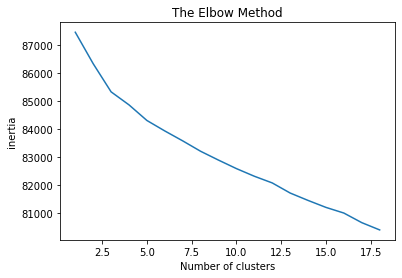

In [14]:
# k-means algorithm

# set clusters to 18 (To start with)
k_clusters = 18

inertia = []
for i in range(1,k_clusters + 1):
    km = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=10)
    km.fit(X_train)
    inertia.append(km.inertia_)
    
plt.plot(range(1,k_clusters + 1 ), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.savefig('elbow.png')
plt.show()

## We can choose the number of clusters as 10.

In [15]:
# https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
# train the model to find 10 clusters

k_clusters = 10

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_train)

KMeans(max_iter=600, n_clusters=10, random_state=0, tol=1e-06)

In [16]:
# make predictions

clusters = model.predict(X_train)

In [17]:
# Create a new column to display the predicted result

df["cluster_name"] = clusters
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,english,text_lemmatized,cluster_name
0,gp:AOqpTOERZcLdCzs_J1Kf7wjtzeBsNdAbZQeQJMvCBdu...,Shailesh Pandey,https://play-lh.googleusercontent.com/a-/AOh14...,after being a premium user i m not able to lo...,1,0,NaN,2022-05-30 04:46:17,NaN,NaN,1,after being a premium user i m not able to log...,9
1,gp:AOqpTOHTyaaVi1rehG_MgWocsfRs05MfB4Umdm3C2MT...,Dil,https://play-lh.googleusercontent.com/a-/AOh14...,fraudulent app if you install a basic version...,1,0,5.271.1,2022-05-30 03:50:07,NaN,NaN,1,fraudulent app if you install a basic version ...,1
2,gp:AOqpTOGAK1FKDatr5sAKsuaq_KyZmqe8JowKF-odD6i...,Robert Whorton,https://play-lh.googleusercontent.com/a/AATXAJ...,it s a lot better than hinge but it s still n...,3,0,5.270.1,2022-05-30 03:20:46,NaN,NaN,1,it s a lot better than hinge but it s still no...,2
3,gp:AOqpTOEoJejC-2H4kzHOcCOfqJIewOvgdhEA9q9YPkT...,Optimum,https://play-lh.googleusercontent.com/a-/AOh14...,good app thanks dear women you are beautiful,5,0,5.271.1,2022-05-30 03:12:53,Thank you for your review.\nWe have acknowledg...,2022-05-30 04:01:59,1,good app thanks dear woman you are beautiful,1
4,gp:AOqpTOH_BjWzbX0ifMvfpxPezKTmJ7MYIVXL-E8r6B5...,Trent Drummond,https://play-lh.googleusercontent.com/a/AATXAJ...,good app nice to use feels alot better usin...,5,0,5.271.1,2022-05-30 02:42:02,NaN,NaN,1,good app nice to use feel alot better using th...,1
5,gp:AOqpTOFvYXtWhExrIyb6PRqrioFEeOXWR74I74lz5QV...,William Alex Pleasant,https://play-lh.googleusercontent.com/a/AATXAJ...,i cancelled my subscription and deleted my acc...,1,0,5.267.0,2022-05-30 02:25:42,NaN,NaN,1,i cancelled my subscription and deleted my acc...,9
6,gp:AOqpTOHYNDnH4KhtozI9zC40xSt23RTbwcudYbfQHcn...,Pass Kall,https://play-lh.googleusercontent.com/a-/AOh14...,hey bumble your rating was at just a few m...,1,3,5.256.1,2022-05-30 02:13:43,Thank you for your review.\nWe have acknowledg...,2022-05-30 02:38:28,1,hey bumble your rating wa at just a few month ...,1
7,gp:AOqpTOE15-Bi0oeDfTTYFdqh3BI9AM1fVC-twkcP1Ia...,Chris Whitson,https://play-lh.googleusercontent.com/a-/AOh14...,you get about likes a day if you have to dea...,1,1,5.270.1,2022-05-30 01:22:11,NaN,NaN,1,you get about like a day if you have to deal w...,1
8,gp:AOqpTOHHpluX_q_pCIEAAqx28vheXLvi7rz7KQRioCx...,Rajat Pratap Singh,https://play-lh.googleusercontent.com/a-/AOh14...,not worth it just better than few other datin...,2,0,5.271.1,2022-05-30 01:02:10,NaN,NaN,1,not worth it just better than few other dating...,2
9,gp:AOqpTOH7l7dai6uJ4HYg3HswUFwJE_1BIkWy11HLKtH...,Brandon Stirling,https://play-lh.googleusercontent.com/a/AATXAJ...,ill give a better rating when it doesn t ask i...,1,0,5.271.1,2022-05-30 00:47:51,NaN,NaN,1,ill give a better rating when it doesn t ask i...,1


In [18]:
df["cluster_name"].value_counts()

1    53304
9    10653
4    10279
6     2734
2     2549
5     2519
7     2285
8     2003
0     1941
3     1239
Name: cluster_name, dtype: int64

In [19]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tv.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(16, 5))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])


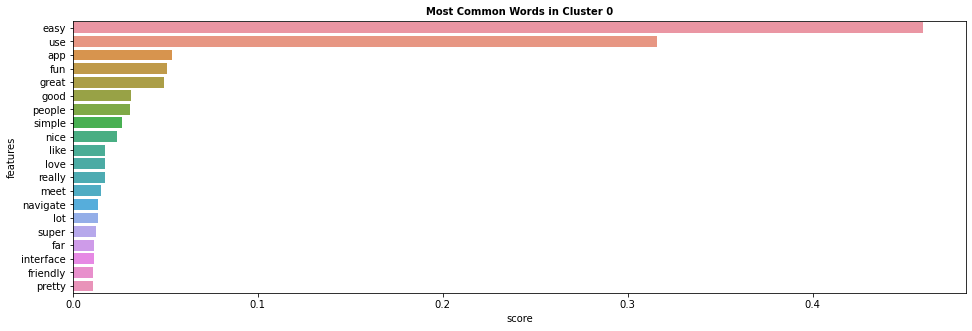

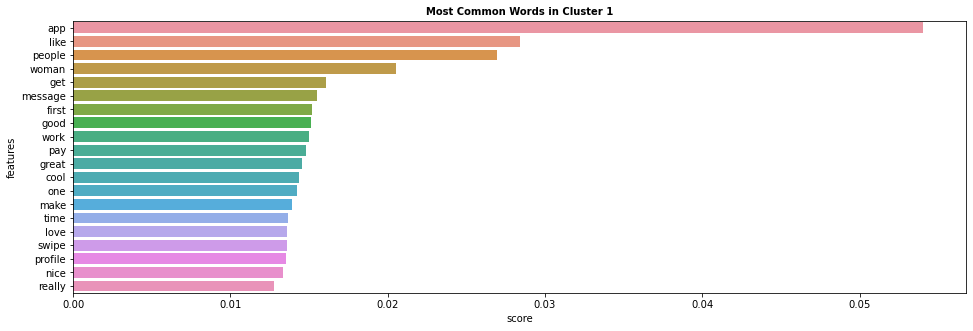

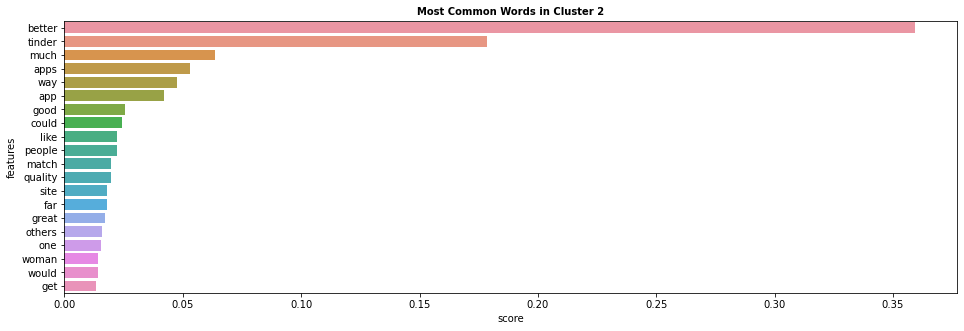

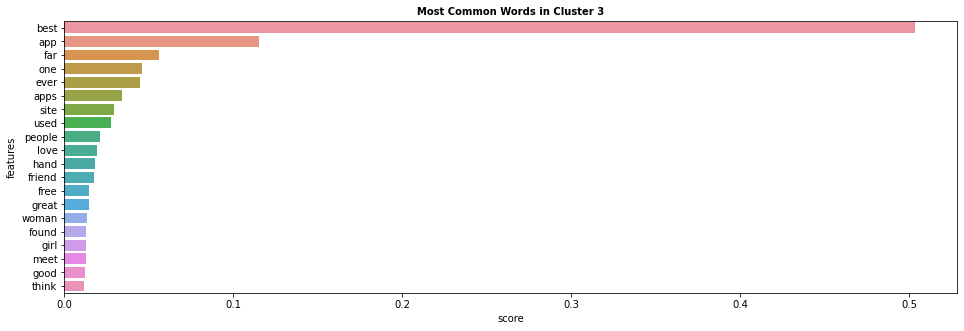

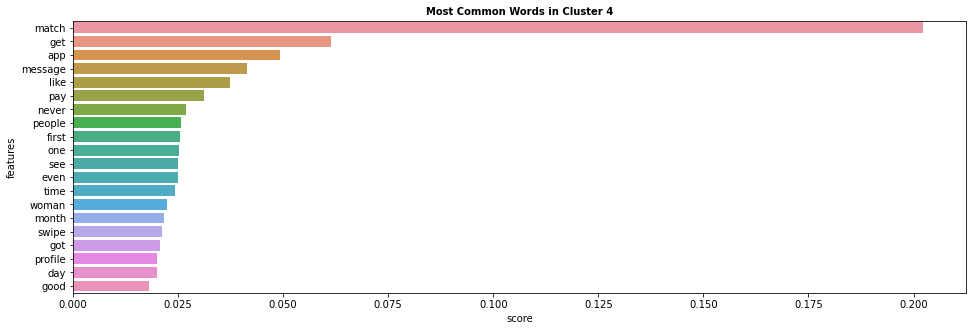

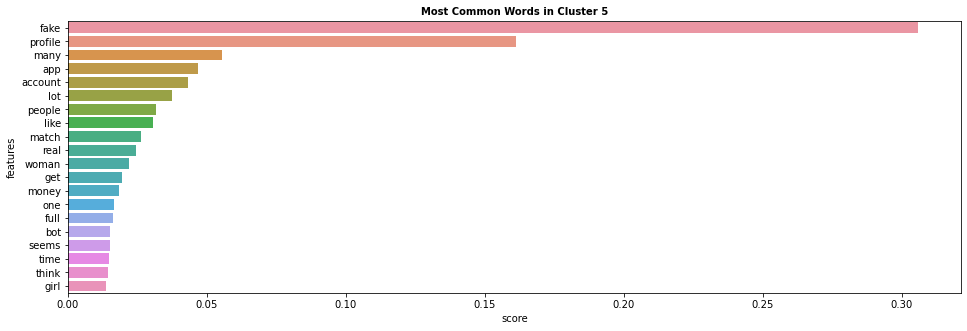

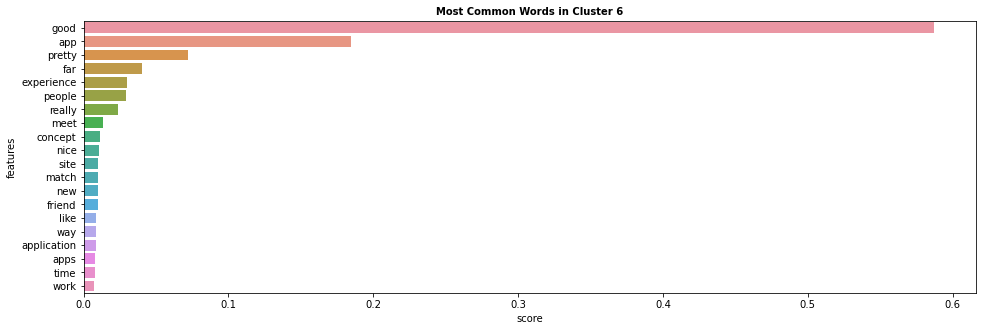

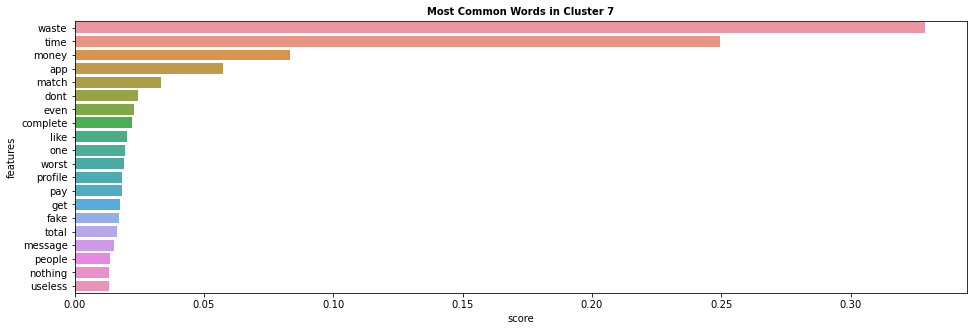

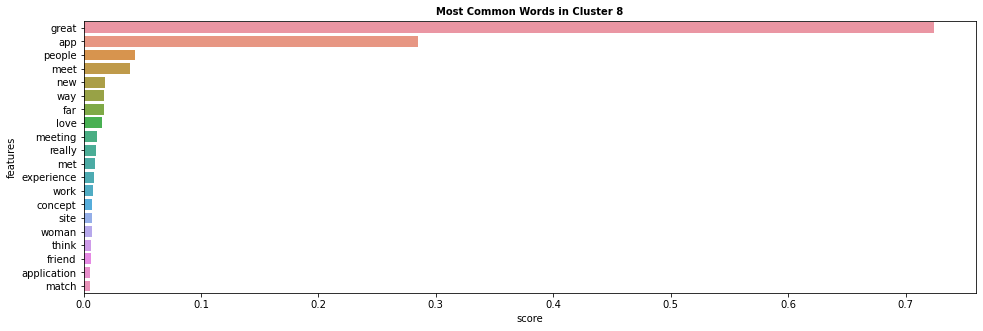

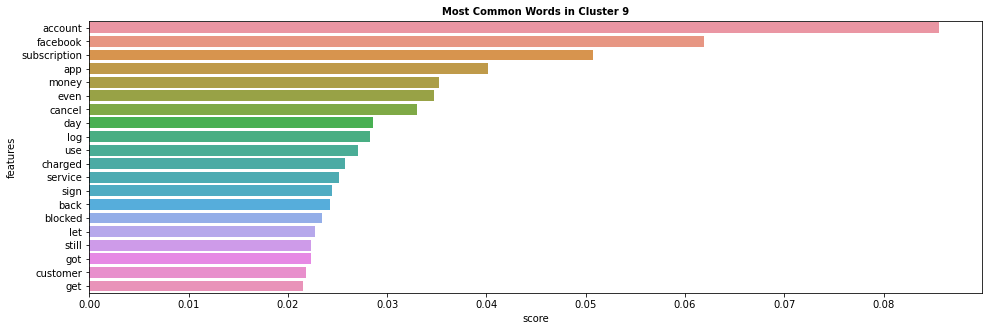

In [20]:
dfs = get_top_features_cluster(X_train.toarray(), clusters, 20)
plotWords(dfs, 20)

## Since the number of features in some topics are very less compared to others, let's try modeling with 5 clusters 

In [21]:
df.drop(['cluster_name'], axis=1, inplace=True)

In [22]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'english', 'text_lemmatized'],
      dtype='object')

In [23]:
# train the model to find 10 clusters

k_clusters = 5

model = KMeans(n_clusters=k_clusters, init='k-means++', n_init=10, max_iter=600, tol=0.000001, random_state=0)
model.fit(X_train)

KMeans(max_iter=600, n_clusters=5, random_state=0, tol=1e-06)

In [24]:
# make predictions

clusters = model.predict(X_train)

In [25]:
# Create a new column to display the predicted result

df["cluster_name"] = clusters
df.head(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,english,text_lemmatized,cluster_name
0,gp:AOqpTOERZcLdCzs_J1Kf7wjtzeBsNdAbZQeQJMvCBdu...,Shailesh Pandey,https://play-lh.googleusercontent.com/a-/AOh14...,after being a premium user i m not able to lo...,1,0,NaN,2022-05-30 04:46:17,NaN,NaN,1,after being a premium user i m not able to log...,0
1,gp:AOqpTOHTyaaVi1rehG_MgWocsfRs05MfB4Umdm3C2MT...,Dil,https://play-lh.googleusercontent.com/a-/AOh14...,fraudulent app if you install a basic version...,1,0,5.271.1,2022-05-30 03:50:07,NaN,NaN,1,fraudulent app if you install a basic version ...,4
2,gp:AOqpTOGAK1FKDatr5sAKsuaq_KyZmqe8JowKF-odD6i...,Robert Whorton,https://play-lh.googleusercontent.com/a/AATXAJ...,it s a lot better than hinge but it s still n...,3,0,5.270.1,2022-05-30 03:20:46,NaN,NaN,1,it s a lot better than hinge but it s still no...,0
3,gp:AOqpTOEoJejC-2H4kzHOcCOfqJIewOvgdhEA9q9YPkT...,Optimum,https://play-lh.googleusercontent.com/a-/AOh14...,good app thanks dear women you are beautiful,5,0,5.271.1,2022-05-30 03:12:53,Thank you for your review.\nWe have acknowledg...,2022-05-30 04:01:59,1,good app thanks dear woman you are beautiful,0
4,gp:AOqpTOH_BjWzbX0ifMvfpxPezKTmJ7MYIVXL-E8r6B5...,Trent Drummond,https://play-lh.googleusercontent.com/a/AATXAJ...,good app nice to use feels alot better usin...,5,0,5.271.1,2022-05-30 02:42:02,NaN,NaN,1,good app nice to use feel alot better using th...,0
5,gp:AOqpTOFvYXtWhExrIyb6PRqrioFEeOXWR74I74lz5QV...,William Alex Pleasant,https://play-lh.googleusercontent.com/a/AATXAJ...,i cancelled my subscription and deleted my acc...,1,0,5.267.0,2022-05-30 02:25:42,NaN,NaN,1,i cancelled my subscription and deleted my acc...,0
6,gp:AOqpTOHYNDnH4KhtozI9zC40xSt23RTbwcudYbfQHcn...,Pass Kall,https://play-lh.googleusercontent.com/a-/AOh14...,hey bumble your rating was at just a few m...,1,3,5.256.1,2022-05-30 02:13:43,Thank you for your review.\nWe have acknowledg...,2022-05-30 02:38:28,1,hey bumble your rating wa at just a few month ...,0
7,gp:AOqpTOE15-Bi0oeDfTTYFdqh3BI9AM1fVC-twkcP1Ia...,Chris Whitson,https://play-lh.googleusercontent.com/a-/AOh14...,you get about likes a day if you have to dea...,1,1,5.270.1,2022-05-30 01:22:11,NaN,NaN,1,you get about like a day if you have to deal w...,4
8,gp:AOqpTOHHpluX_q_pCIEAAqx28vheXLvi7rz7KQRioCx...,Rajat Pratap Singh,https://play-lh.googleusercontent.com/a-/AOh14...,not worth it just better than few other datin...,2,0,5.271.1,2022-05-30 01:02:10,NaN,NaN,1,not worth it just better than few other dating...,0
9,gp:AOqpTOH7l7dai6uJ4HYg3HswUFwJE_1BIkWy11HLKtH...,Brandon Stirling,https://play-lh.googleusercontent.com/a/AATXAJ...,ill give a better rating when it doesn t ask i...,1,0,5.271.1,2022-05-30 00:47:51,NaN,NaN,1,ill give a better rating when it doesn t ask i...,0


In [26]:
df["cluster_name"].value_counts()

0    61940
4    20318
1     3078
3     2135
2     2035
Name: cluster_name, dtype: int64

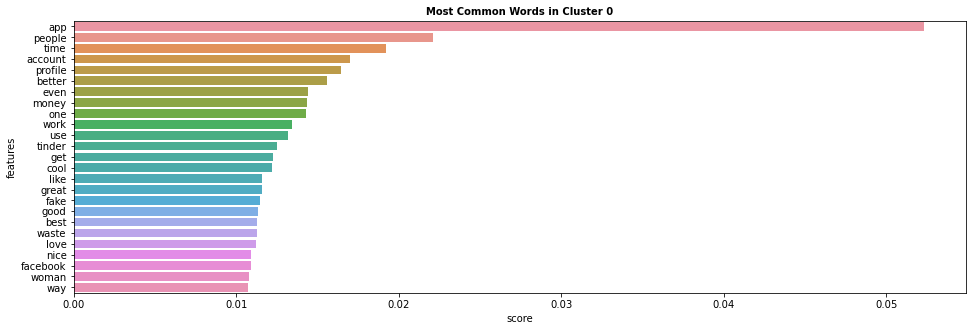

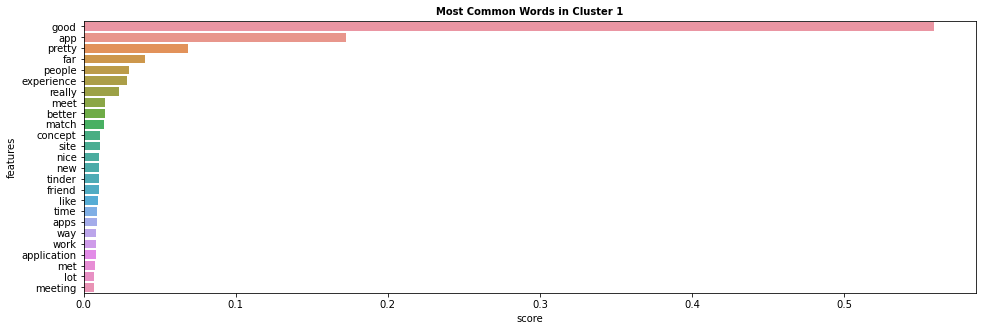

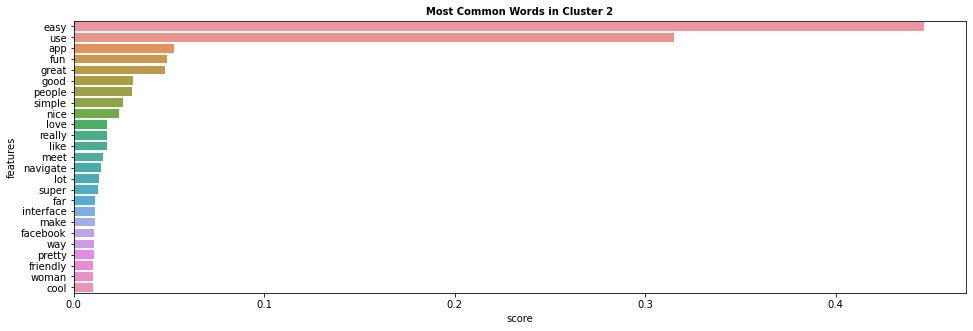

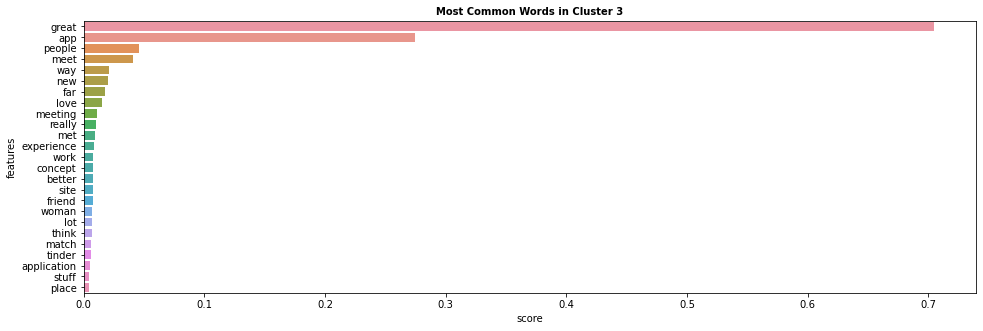

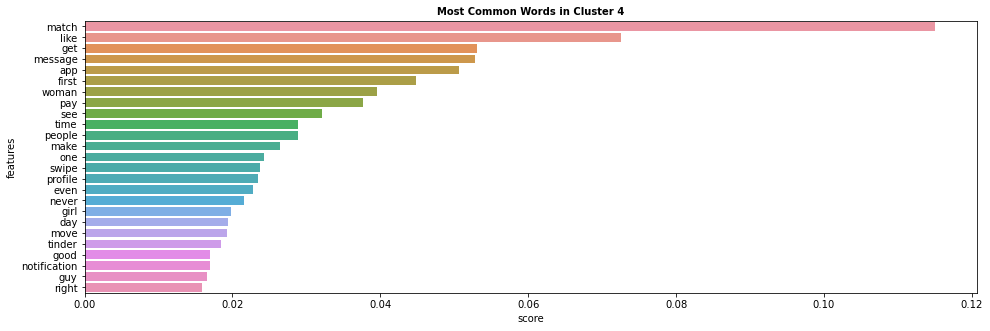

In [27]:
dfs = get_top_features_cluster(X_train.toarray(), clusters, 25)
plotWords(dfs, 25)

##  Visualizations

### Wordcloud 

In [28]:
cluster0_df = df[df["cluster_name"]==0]
cluster1_df = df[df["cluster_name"]==1]
cluster2_df = df[df["cluster_name"]==2]
cluster3_df = df[df["cluster_name"]==3]
cluster4_df = df[df["cluster_name"]==4]


In [29]:
print(cluster0_df.cluster_name.value_counts())
print(cluster1_df.cluster_name.value_counts())
print(cluster2_df.cluster_name.value_counts())
print(cluster3_df.cluster_name.value_counts())
print(cluster4_df.cluster_name.value_counts())

0    61940
Name: cluster_name, dtype: int64
1    3078
Name: cluster_name, dtype: int64
2    2035
Name: cluster_name, dtype: int64
3    2135
Name: cluster_name, dtype: int64
4    20318
Name: cluster_name, dtype: int64


In [30]:
# conda install -c conda-forge wordcloud ---- run in the terminal

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# Creating the text variable

def generate_wordcloud(df):
    
    stopwords = set(STOPWORDS)
    stopwords.update(set(stpwrd))      # update returns none

    text2 = " ".join(row for row in df.text_lemmatized)

    # Creating word_cloud with text as argument in .generate() method

    word_cloud2 = WordCloud(width = 1400, height = 1000, collocations = False, stopwords = stopwords, background_color = 'white').generate(text2)

    # Display the generated Word Cloud

    plt.figure(figsize = (8, 22), facecolor = None)
    plt.imshow(word_cloud2, interpolation='bilinear')
    plt.axis("off")

    plt.show()
    
# print(sorted(stopwords)) 


(cluster0)-Bad Reviews For Paid Subscriptions


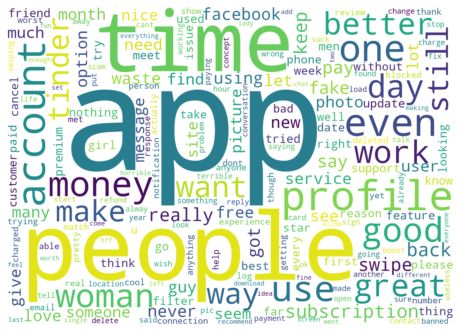

In [31]:
# In the order, of highest to lowest value_counts

print('(cluster0)-Bad Reviews For Paid Subscriptions')
generate_wordcloud(cluster0_df)

(cluster4)-Profile Match


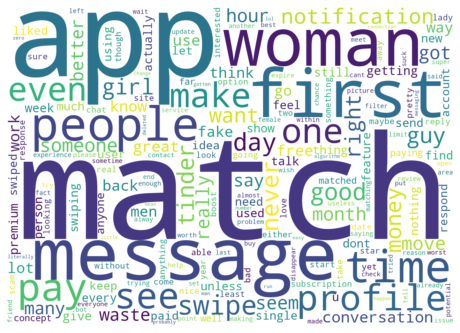

In [32]:
print('(cluster4)-Profile Match')
generate_wordcloud(cluster4_df)

(cluster1)-Good Reviews


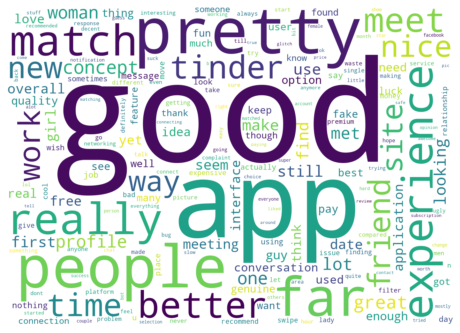

In [33]:
print('(cluster1)-Good Reviews')
generate_wordcloud(cluster1_df)

(cluster3)-Good Reviews About People On The App


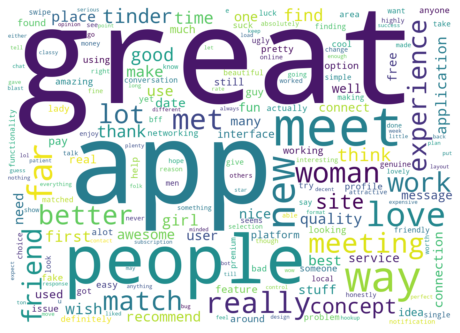

In [34]:
print('(cluster3)-Good Reviews About People On The App')
generate_wordcloud(cluster3_df)

(cluster2)-Easy To Use


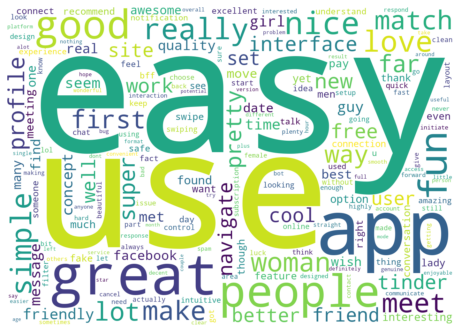

In [35]:
print('(cluster2)-Easy To Use')
generate_wordcloud(cluster2_df)

In [36]:
# line plots by month

print(type(df.iloc[0,7]))
print(df.iloc[0,7])
print(df.iloc[0,7].split()[0])

<class 'str'>
2022-05-30 04:46:17
2022-05-30


In [37]:
import datetime

def create_month_year(row):
    row['at'] = row['at'].split()[0]
    return datetime.datetime.strptime(row['at'], "%Y-%m-%d")

In [38]:
# df.drop(columns=['month_year'], axis=1)

df['month_year'] = df.apply(create_month_year, axis=1)
df['month_year'].head()

0   2022-05-30
1   2022-05-30
2   2022-05-30
3   2022-05-30
4   2022-05-30
Name: month_year, dtype: datetime64[ns]

In [39]:
df['month_year'][1].month

5

In [40]:
print(df.month_year.head())
print(type(df.loc[1, 'month_year']))
print(df.month_year.value_counts())

0   2022-05-30
1   2022-05-30
2   2022-05-30
3   2022-05-30
4   2022-05-30
Name: month_year, dtype: datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
2019-04-23    279
2018-03-06    181
2022-04-28    169
2021-12-18    152
2021-12-14    141
             ... 
2016-04-07      1
2015-11-29      1
2015-11-30      1
2015-12-27      1
2016-07-03      1
Name: month_year, Length: 2374, dtype: int64


In [41]:
# create a new dataframe

df_time = df.month_year.value_counts().reset_index()
df_time.head()

,index,month_year
0,2019-04-23,279
1,2018-03-06,181
2,2022-04-28,169
3,2021-12-18,152
4,2021-12-14,141


In [42]:
df_time = df_time.rename(columns={"index": "date", "month_year": "reviews_count"})
df_time.head()

,date,reviews_count
0,2019-04-23,279
1,2018-03-06,181
2,2022-04-28,169
3,2021-12-18,152
4,2021-12-14,141


In [43]:
df_time = df_time.sort_values(by='date')
df_time

,date,reviews_count
2370,2015-11-29,1
2371,2015-11-30,1
2196,2015-12-01,9
2092,2015-12-02,11
2206,2015-12-03,8
...,...,...
97,2022-05-26,77
81,2022-05-27,79
185,2022-05-28,67
190,2022-05-29,67


In [44]:
len(df[df.month_year=='2015-12-02'])     # should be 11

11

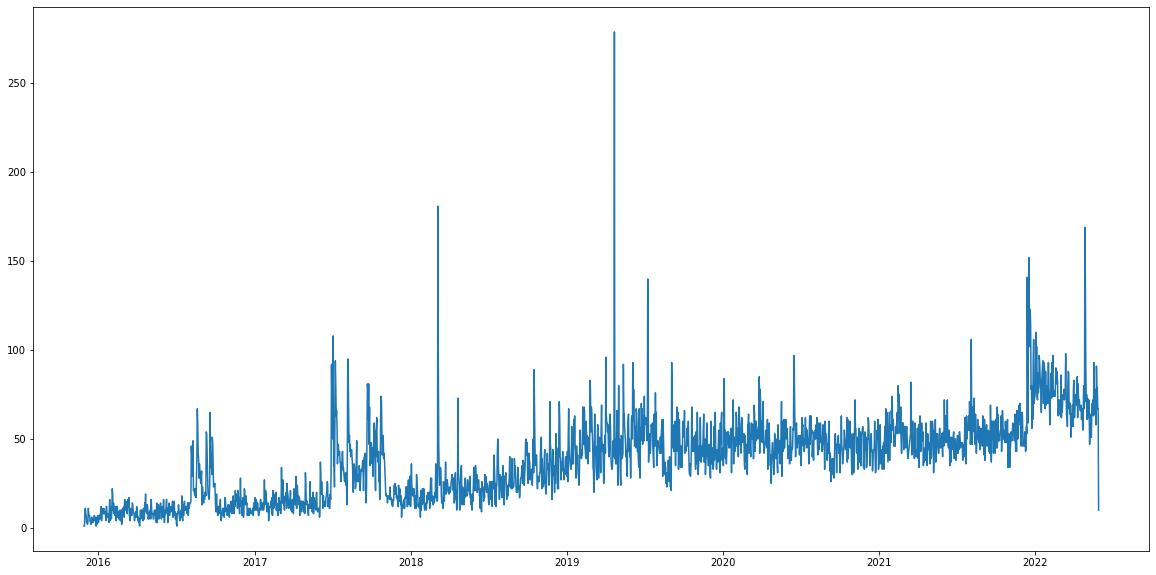

In [45]:
plt.figure(figsize=(20, 10))
plt.plot(df_time.date, df_time.reviews_count)

## NMF Topic Modeling

In [46]:
nmf = NMF(5, init = "nndsvda")
nmf.fit(doc_term)
nmf

NMF(init='nndsvda', n_components=5)

In [47]:
topic_term = nmf.components_.round(3)
topic_term.shape

(5, 4843)

In [48]:
topic_term_df = pd.DataFrame(topic_term.round(3),
                index = ["component_1", "component_2", "component_3", "component_4", "component_5"],
                columns = doc_term_df.columns)
topic_term_df

,abandon,abandoned,ability,able,abortion,abroad,abruptly,absolute,absolutely,absurd,...,youre,youtube,youve,zero,zilch,zip,zodiac,zone,zoom,zoosk
component_1,0.002,0.01,0.042,0.296,0.002,0.002,0.002,0.062,0.117,0.014,...,0.018,0.008,0.005,0.144,0.003,0.004,0.003,0.005,0.006,0.004
component_2,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.007,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.000
component_3,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.001,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
component_4,0.000,0.00,0.006,0.028,0.000,0.000,0.000,0.000,0.006,0.000,...,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.001
component_5,0.000,0.00,0.007,0.000,0.000,0.001,0.000,0.000,0.001,0.000,...,0.002,0.000,0.001,0.000,0.000,0.001,0.000,0.001,0.003,0.008


In [49]:
# Function to display the top n terms in each topic
def display_topics(model, feature_names, no_top_words, topic_names = None): 
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix + 1)
        else:
            print("\nTopic: ", topic_names[ix])
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
    print("\n")
    return model, feature_names, no_top_words

In [50]:
output = display_topics(nmf, doc_term_df.columns, 30)
output;


Topic  1
match, app, like, get, time, message, profile, people, pay, woman, even, one, first, money, waste, see, swipe, make, day, never, fake, account, want, got, work, would, month, back, many, say

Topic  2
great, app, people, meet, love, new, best, way, friend, met, awesome, far, work, concept, nice, meeting, really, experience, worst, idea, woman, lot, think, connection, recommend, amazing, thanks, user, place, interface

Topic  3
good, app, pretty, far, experience, really, people, nice, concept, best, friend, meet, overall, love, site, met, luck, looking, interface, work, idea, application, used, meeting, awesome, date, new, enough, quality, thing

Topic  4
easy, use, fun, facebook, nice, people, simple, app, love, really, meet, lot, super, navigate, interface, friendly, free, set, friend, make, new, user, account, sign, site, way, feature, well, option, without

Topic  5
better, tinder, cool, much, way, apps, people, meet, far, pretty, nice, quality, site, could, like, lot, bes

In [77]:
# assign topic names, by checking the above result

display_topics(nmf, doc_term_df.columns, 30, ['Bad Reviews For Paid Subscriptions', 'Profile Match', 'Good Reviews', 'Good Reviews About People On The App', 'Easy To Use']);



Topic:  Bad Reviews For Paid Subscriptions
match, app, like, get, time, message, profile, people, pay, woman, even, one, first, money, waste, see, swipe, make, day, never, fake, account, want, got, work, would, month, back, many, say

Topic:  Profile Match
great, app, people, meet, love, new, best, way, friend, met, awesome, far, work, concept, nice, meeting, really, experience, worst, idea, woman, lot, think, connection, recommend, amazing, thanks, user, place, interface

Topic:  Good Reviews
good, app, pretty, far, experience, really, people, nice, concept, best, friend, meet, overall, love, site, met, luck, looking, interface, work, idea, application, used, meeting, awesome, date, new, enough, quality, thing

Topic:  Good Reviews About People On The App
easy, use, fun, facebook, nice, people, simple, app, love, really, meet, lot, super, navigate, interface, friendly, free, set, friend, make, new, user, account, sign, site, way, feature, well, option, without

Topic:  Easy To Use
be

In [52]:
doc_topic = nmf.transform(doc_term)
doc_topic.shape

(89506, 5)

In [53]:
# add topic names to the columns

doc_topic_df = pd.DataFrame(doc_topic.round(5), index = df.content, columns = ['Bad Reviews For Paid Subscriptions', 'Profile Match', 'Good Reviews', 'Good Reviews About People On The App', 'Easy To Use'])
doc_topic_df

,Bad Reviews For Paid Subscriptions,Profile Match,Good Reviews,Good Reviews About People On The App,Easy To Use
content,,,,,
after being a premium user i m not able to login to my id pathetic experience no customer support is provided,0.00848,0.00000,0.00075,0.00049,0.00083
fraudulent app if you install a basic version you will get many likes but it s blurred and you need to upgrade to premium plan to see your likes once you upgrade to a premium plan all the likes will vanish what a easy way to lure members to a premium plan,0.02022,0.00019,0.00000,0.01521,0.00271
it s a lot better than hinge but it s still not that great reluctant to spend any money all of these dating apps are a bad value,0.00496,0.02833,0.00000,0.00000,0.04421
good app thanks dear women you are beautiful,0.00695,0.00348,0.04907,0.00000,0.00000
good app nice to use feels alot better using this than other apps around i wont mention any but it rhymes with binder,0.00423,0.00150,0.03256,0.02477,0.04071
...,...,...,...,...,...
finally here,0.00100,0.00000,0.00000,0.00000,0.00021
finally,0.00100,0.00000,0.00000,0.00000,0.00021
finally an app where women have to start the conversation love the concept i feel more comfortable and less of a pest this way i did run out of people after minutes though,0.01751,0.00769,0.00410,0.00234,0.01395


In [54]:
import numpy as np

def get_top_terms(topic, n_terms, nmf=nmf, terms=topic_term_df.columns):
    # get the topic components (i.e., term weights)
    components = nmf.components_[topic, :]

    # get term indices, sorted (descending) by topic weights
    top_term_indices = components.argsort()[-n_terms:][::-1]
    
    # use the `terms` array to get the actual top terms
    top_terms = np.array(terms)[top_term_indices]
    
    return top_terms.tolist()

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# Creating the text variable

def generate_wordcloud_nmf():
    
    stopwords = set(STOPWORDS)
    stopwords.update(set(stpwrd))      # update returns none

    # Creating word_cloud with text as argument in .generate() method
    for i in range(5):
        
        text2 = " ".join(get_top_terms(i,100))

        word_cloud2 = WordCloud(width=1000,height=700,margin=3,stopwords = stopwords,collocations = False,prefer_horizontal=0.7,scale=1,background_color='white',relative_scaling=0).generate(text2)
        # Display the generated Word Cloud

        plt.figure(figsize = (8, 22), facecolor = None)
        plt.imshow(word_cloud2, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Topic-{i+1}")

        plt.show()

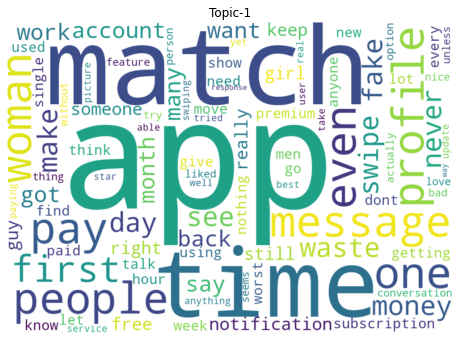

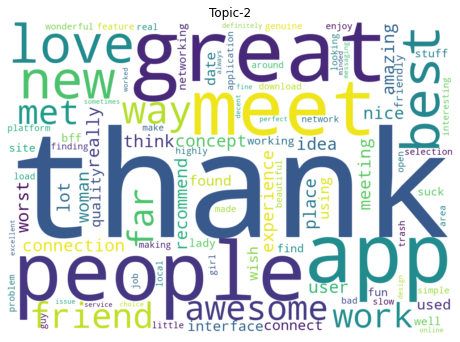

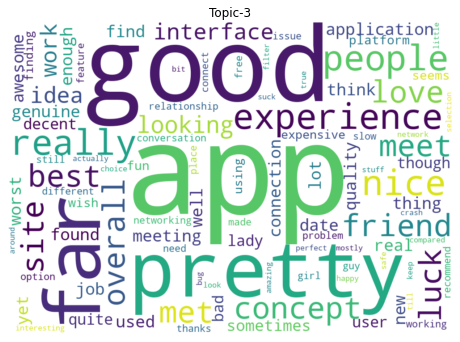

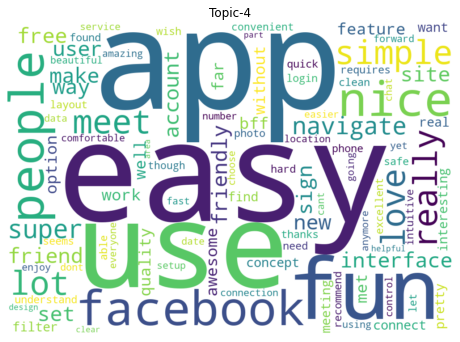

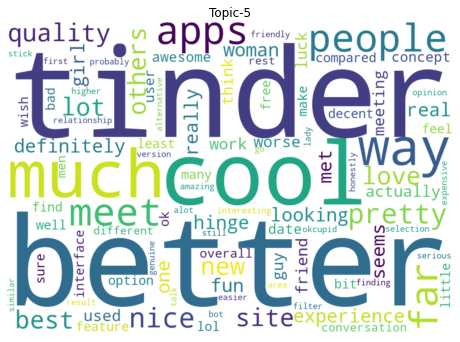

In [56]:
generate_wordcloud_nmf()

## Naive Bayes Model

In [57]:
# create new column called sentiment with positive and negative as values depending on df.score

def create_sentiment(row):
    if row['score']==1 or row['score']==2 or row['score']==3:
        return 'Negative'
    elif row['score']==4 or row['score']==5:
        return 'Positive' 
    
df['sentiment'] = df.apply(create_sentiment, axis=1)
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,english,text_lemmatized,cluster_name,month_year,sentiment
0,gp:AOqpTOERZcLdCzs_J1Kf7wjtzeBsNdAbZQeQJMvCBdu...,Shailesh Pandey,https://play-lh.googleusercontent.com/a-/AOh14...,after being a premium user i m not able to lo...,1,0,NaN,2022-05-30 04:46:17,NaN,NaN,1,after being a premium user i m not able to log...,0,2022-05-30,Negative
1,gp:AOqpTOHTyaaVi1rehG_MgWocsfRs05MfB4Umdm3C2MT...,Dil,https://play-lh.googleusercontent.com/a-/AOh14...,fraudulent app if you install a basic version...,1,0,5.271.1,2022-05-30 03:50:07,NaN,NaN,1,fraudulent app if you install a basic version ...,4,2022-05-30,Negative
2,gp:AOqpTOGAK1FKDatr5sAKsuaq_KyZmqe8JowKF-odD6i...,Robert Whorton,https://play-lh.googleusercontent.com/a/AATXAJ...,it s a lot better than hinge but it s still n...,3,0,5.270.1,2022-05-30 03:20:46,NaN,NaN,1,it s a lot better than hinge but it s still no...,0,2022-05-30,Negative
3,gp:AOqpTOEoJejC-2H4kzHOcCOfqJIewOvgdhEA9q9YPkT...,Optimum,https://play-lh.googleusercontent.com/a-/AOh14...,good app thanks dear women you are beautiful,5,0,5.271.1,2022-05-30 03:12:53,Thank you for your review.\nWe have acknowledg...,2022-05-30 04:01:59,1,good app thanks dear woman you are beautiful,0,2022-05-30,Positive
4,gp:AOqpTOH_BjWzbX0ifMvfpxPezKTmJ7MYIVXL-E8r6B5...,Trent Drummond,https://play-lh.googleusercontent.com/a/AATXAJ...,good app nice to use feels alot better usin...,5,0,5.271.1,2022-05-30 02:42:02,NaN,NaN,1,good app nice to use feel alot better using th...,0,2022-05-30,Positive


In [58]:
# # train a naive bayes model
from sklearn.model_selection import train_test_split

# define the input and output of the model
X = df.content
y = df.sentiment

# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tv = TfidfVectorizer()

X_train_tv = tv.fit_transform(X_train)
X_test_tv  = tv.transform(X_test)

In [59]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_tv.toarray(), y_train)
tfidf_score = gnb.score(X_test_tv.toarray(), y_test)

tfidf_score

0.5038358409057053

In [60]:
mnb = MultinomialNB()
mnb.fit(X_train_tv, y_train)
mnb.score(X_test_tv, y_test)

0.8552063161030836

## Vader Sentiment

In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

df['vader_score'] = df.content.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,english,text_lemmatized,cluster_name,month_year,sentiment,vader_score
0,gp:AOqpTOERZcLdCzs_J1Kf7wjtzeBsNdAbZQeQJMvCBdu...,Shailesh Pandey,https://play-lh.googleusercontent.com/a-/AOh14...,after being a premium user i m not able to lo...,1,0,NaN,2022-05-30 04:46:17,NaN,NaN,1,after being a premium user i m not able to log...,0,2022-05-30,Negative,-0.7997
1,gp:AOqpTOHTyaaVi1rehG_MgWocsfRs05MfB4Umdm3C2MT...,Dil,https://play-lh.googleusercontent.com/a-/AOh14...,fraudulent app if you install a basic version...,1,0,5.271.1,2022-05-30 03:50:07,NaN,NaN,1,fraudulent app if you install a basic version ...,4,2022-05-30,Negative,0.9011
2,gp:AOqpTOGAK1FKDatr5sAKsuaq_KyZmqe8JowKF-odD6i...,Robert Whorton,https://play-lh.googleusercontent.com/a/AATXAJ...,it s a lot better than hinge but it s still n...,3,0,5.270.1,2022-05-30 03:20:46,NaN,NaN,1,it s a lot better than hinge but it s still no...,0,2022-05-30,Negative,-0.6163


In [62]:
most_positive = df.iloc[df.score.idxmax()]
most_positive

reviewId                gp:AOqpTOEoJejC-2H4kzHOcCOfqJIewOvgdhEA9q9YPkT...
userName                                                          Optimum
userImage               https://play-lh.googleusercontent.com/a-/AOh14...
content                    good app  thanks dear women  you are beautiful
score                                                                   5
thumbsUpCount                                                           0
reviewCreatedVersion                                              5.271.1
at                                                    2022-05-30 03:12:53
replyContent            Thank you for your review.\nWe have acknowledg...
repliedAt                                             2022-05-30 04:01:59
english                                                                 1
text_lemmatized              good app thanks dear woman you are beautiful
cluster_name                                                            0
month_year                            

In [63]:
most_negative = df.iloc[df.score.idxmin()]
most_negative

reviewId                gp:AOqpTOERZcLdCzs_J1Kf7wjtzeBsNdAbZQeQJMvCBdu...
userName                                                  Shailesh Pandey
userImage               https://play-lh.googleusercontent.com/a-/AOh14...
content                 after being a premium user  i m not able to lo...
score                                                                   1
thumbsUpCount                                                           0
reviewCreatedVersion                                                  NaN
at                                                    2022-05-30 04:46:17
replyContent                                                          NaN
repliedAt                                                             NaN
english                                                                 1
text_lemmatized         after being a premium user i m not able to log...
cluster_name                                                            0
month_year                            

In [64]:
most_negative['content']

'after being a premium user  i m not able to login to my id  pathetic experience  no customer support is provided '

# Scattertext

In [65]:
# https://analyticsindiamag.com/visualizing-sentiment-analysis-reports-using-scattertext-nlp-tool/

import scattertext as st

In [66]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'english', 'text_lemmatized', 'cluster_name', 'month_year',
       'sentiment', 'vader_score'],
      dtype='object')

In [67]:
# Build the Corpus¶ 

corpus = st.CorpusFromPandas(
    df,
    category_col = 'sentiment',
    text_col = 'text_lemmatized',
    nlp=st.whitespace_nlp_with_sentences
).build()

In [68]:
html = st.produce_scattertext_explorer(
        corpus,
        category="Positive",
        category_name='Positive',
        not_category_name='Negative',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        metadata=df['userName'],
        )


In [69]:
open('bumble_reviews.html', 'wb').write(html.encode('utf-8'));

In [70]:
# Now it's time to save your HTML and download this file to your computer. Execute the cells below which will create
# and download an HTML file called "airbnb_reviews.html" to the current directory you are working from.

# You just created your first scattertext. Now it's time to explore. Open the file you just downloaded -- a simple 
# double click should do the trick. Give the file a few minutes to load into your browser